# Part 1: Time series of Wikipedia page revisions


Step 1: Using Assignment 4's code as a starting point code from the notebooks from Oct 14, 2021, you will retrieve and store as JSON files the revision history of each of the Wikipedia pages of: 
- Lady Gaga 
- Taylor Swift 
- Alicia Keys
- Mariah Carey


#### Installation

This notebok requires the package mwclient that talks to Wikipedia pages. If you completed the previous Wikipedia tutorial, you should have already installed it.

In [1]:
!pip install mwclient

Import modules we will need to do the extraction and the analysis. 

In [2]:
import mwclient
import json
import time
import pandas as pd
from pandas import Series, DataFrame


In [3]:
from datetime import datetime
from time import mktime
from itertools import islice
import numpy as np

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Step 1: Visit all the Pages of the 4 women and extract the data for every time a revision was made, in the datetime format. 

Go to Taylor Swift's page and get the timestamp for the revision in the format of year month date.

In [4]:
from mwclient import Site
site = Site('en.wikipedia.org')
taylor = site.pages['Taylor_Swift']
taylor.name

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Taylor Swift'

In [5]:
taylor.revision

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1052892513

In [7]:
revisions_Taylor = [rev for rev in taylor.revisions()]
len(revisions_Taylor)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14836

In [8]:
import json
with open("TaylorRevisions.json", 'w') as jsonFile:
    json.dump(revisions_Taylor, jsonFile)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
ls -al

total 7320
drwxr-xr-x  6 zeynoyalcin  staff      192 Oct 31 17:27 ./
drwxr-xr-x  5 zeynoyalcin  staff      160 Oct 25 23:41 ../
drwxr-xr-x  2 zeynoyalcin  staff       64 Oct 31 17:26 .ipynb_checkpoints/
-rw-r--r--@ 1 zeynoyalcin  staff   791901 Oct 27 23:31 CS234_A05_part1.html
-rw-r--r--@ 1 zeynoyalcin  staff   188845 Oct 27 23:22 CS234_A05_part1.ipynb
-rw-r--r--  1 zeynoyalcin  staff  2760600 Oct 31 17:27 TaylorRevisions.json


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
ls 

CS234_A05_part1.html   CS234_A05_part1.ipynb  TaylorRevisions.json


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
ls -a

./                     .ipynb_checkpoints/    CS234_A05_part1.ipynb
../                    CS234_A05_part1.html   TaylorRevisions.json


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
ts = revisions_Taylor[0]['timestamp']
ts

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time.struct_time(tm_year=2021, tm_mon=10, tm_mday=31, tm_hour=18, tm_min=3, tm_sec=40, tm_wday=6, tm_yday=304, tm_isdst=-1)

In [15]:
datetime.fromtimestamp(mktime(ts))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.datetime(2021, 10, 31, 18, 3, 40)

In [16]:
def createDateTime(timestamp):
    """convert a timestruct to datetime"""
    return datetime.fromtimestamp(mktime(timestamp))

dates = [str(createDateTime(rev['timestamp']).date()) for rev in revisions_Taylor]

# what does str(createDateTime(rev['timestamp']).date()) do?
# 1. it call the function createDateTime with each revision's timestamp object
# 2. then it applies the method date() on the returned datetime object, to get a date object
# 3. it converts the date object into a string

dates[:10]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-31']

In [17]:
taylor_Rev = Series(revisions_Taylor, index=pd.to_datetime(dates))
taylor_Rev.head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-10-31    {'revid': 1052892513, 'parentid': 1052889913, ...
2021-10-31    {'revid': 1052889913, 'parentid': 1052887915, ...
2021-10-31    {'revid': 1052887915, 'parentid': 1052887331, ...
2021-10-31    {'revid': 1052887331, 'parentid': 1052886587, ...
2021-10-31    {'revid': 1052886587, 'parentid': 1052886181, ...
2021-10-31    {'revid': 1052886181, 'parentid': 1052885825, ...
2021-10-31    {'revid': 1052885825, 'parentid': 1052885477, ...
2021-10-31    {'revid': 1052885477, 'parentid': 1052885074, ...
2021-10-31    {'revid': 1052885074, 'parentid': 1052884701, ...
2021-10-31    {'revid': 1052884701, 'parentid': 1052884531, ...
dtype: object

In [18]:
# find the first year and last year of revisions
minR = taylor_Rev.index.min().month      # find min value, get its year
maxR = taylor_Rev.index.max().month      # find max value, get its year

print(minR, maxR)

6 10


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
revByMonth_Taylor = taylor_Rev.resample('M').count()
revByMonth_Taylor

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2006-06-30      7
2006-07-31      5
2006-08-31      4
2006-09-30     13
2006-10-31     26
             ... 
2021-06-30     70
2021-07-31    125
2021-08-31    128
2021-09-30     79
2021-10-31    217
Freq: M, Length: 185, dtype: int64

In [20]:
df_Taylor = pd.DataFrame(revByMonth_Taylor)
df_T = df_Taylor.reset_index(level=0, inplace=True)
df_T = df_Taylor.rename(columns={df_Taylor.columns[0]: 'timestamp', df_Taylor.columns[1]: 'Taylor Swift'})
df_T

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Taylor Swift
0,2006-06-30,7
1,2006-07-31,5
2,2006-08-31,4
3,2006-09-30,13
4,2006-10-31,26
...,...,...
180,2021-06-30,70
181,2021-07-31,125
182,2021-08-31,128
183,2021-09-30,79


Go to Lady Gaga's page and get the timestamp for the revision in the format of year month date.

In [21]:
site = Site('en.wikipedia.org')
gaga = site.pages['Lady_Gaga']
gaga.name

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Lady Gaga'

In [22]:
gaga.revision

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1052452017

In [23]:
revisions_Gaga = [rev for rev in gaga.revisions()]
len(revisions_Gaga)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16338

In [24]:
import json
with open("GagaRevisions.json", 'w') as jsonFile:
    json.dump(revisions_Gaga, jsonFile)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
lg = revisions_Gaga[0]['timestamp']
lg

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time.struct_time(tm_year=2021, tm_mon=10, tm_mday=29, tm_hour=6, tm_min=45, tm_sec=31, tm_wday=4, tm_yday=302, tm_isdst=-1)

In [26]:
dates_Gaga = [str(createDateTime(rev['timestamp']).date()) for rev in revisions_Gaga]
dates_Gaga[:10]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2021-10-29',
 '2021-10-28',
 '2021-10-28',
 '2021-10-27',
 '2021-10-26',
 '2021-10-26',
 '2021-10-26',
 '2021-10-23',
 '2021-10-22',
 '2021-10-22']

In [27]:
gaga_Rev = Series(revisions_Gaga, index=pd.to_datetime(dates_Gaga))
gaga_Rev.head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-10-29    {'revid': 1052452017, 'parentid': 1052395781, ...
2021-10-28    {'revid': 1052395781, 'parentid': 1052326229, ...
2021-10-28    {'revid': 1052326229, 'parentid': 1052118309, ...
2021-10-27    {'revid': 1052118309, 'parentid': 1052005269, ...
2021-10-26    {'revid': 1052005269, 'parentid': 1052004778, ...
2021-10-26    {'revid': 1052004778, 'parentid': 1051927677, ...
2021-10-26    {'revid': 1051927677, 'parentid': 1051389081, ...
2021-10-23    {'revid': 1051389081, 'parentid': 1051225550, ...
2021-10-22    {'revid': 1051225550, 'parentid': 1051222732, ...
2021-10-22    {'revid': 1051222732, 'parentid': 1051172634, ...
dtype: object

In [28]:
revByMonth_Gaga = gaga_Rev.resample('M').count()
revByMonth_Gaga

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2008-06-30     40
2008-07-31    144
2008-08-31    211
2008-09-30    309
2008-10-31    347
             ... 
2021-06-30     32
2021-07-31     50
2021-08-31    101
2021-09-30     46
2021-10-31     36
Freq: M, Length: 161, dtype: int64

In [29]:
df_Gaga = pd.DataFrame(revByMonth_Gaga)
df_G = df_Gaga.reset_index(level=0, inplace=True)
df_G = df_Gaga.rename(columns={df_Gaga.columns[0]: 'timestamp', df_Gaga.columns[1]: 'Lady Gaga'})
df_G

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Lady Gaga
0,2008-06-30,40
1,2008-07-31,144
2,2008-08-31,211
3,2008-09-30,309
4,2008-10-31,347
...,...,...
156,2021-06-30,32
157,2021-07-31,50
158,2021-08-31,101
159,2021-09-30,46


Go to Mariah Carey's page and get the timestamp for the revision in the format of year month date.

In [30]:
site = Site('en.wikipedia.org')
mariah = site.pages['Mariah_Carey']
mariah.name

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Mariah Carey'

In [31]:
mariah.revision

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1052901008

In [32]:
revisions_Mariah = [rev for rev in mariah.revisions()]
len(revisions_Mariah)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20106

In [33]:
import json
with open("MariahRevisions.json", 'w') as jsonFile:
    json.dump(revisions_Mariah, jsonFile)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
mc = revisions_Mariah[0]['timestamp']
mc

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time.struct_time(tm_year=2021, tm_mon=10, tm_mday=31, tm_hour=19, tm_min=4, tm_sec=56, tm_wday=6, tm_yday=304, tm_isdst=-1)

In [35]:
dates_Mariah = [str(createDateTime(rev['timestamp']).date()) for rev in revisions_Mariah]
dates_Mariah[:10]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2021-10-31',
 '2021-10-31',
 '2021-10-31',
 '2021-10-27',
 '2021-10-27',
 '2021-10-22',
 '2021-10-22',
 '2021-10-22',
 '2021-10-22',
 '2021-10-18']

In [44]:
mariah_Rev = Series(revisions_Mariah, index=pd.to_datetime(dates_Mariah))
mariah_Rev.head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-10-31    {'revid': 1052901008, 'parentid': 1052800671, ...
2021-10-31    {'revid': 1052800671, 'parentid': 1052798065, ...
2021-10-31    {'revid': 1052798065, 'parentid': 1052040786, ...
2021-10-27    {'revid': 1052040786, 'parentid': 1052034970, ...
2021-10-27    {'revid': 1052034970, 'parentid': 1051316790, ...
2021-10-22    {'revid': 1051316790, 'parentid': 1051200659, ...
2021-10-22    {'revid': 1051200659, 'parentid': 1051200279, ...
2021-10-22    {'revid': 1051200279, 'parentid': 1051200059, ...
2021-10-22    {'revid': 1051200059, 'parentid': 1050466246, ...
2021-10-18    {'revid': 1050466246, 'parentid': 1050157660, ...
dtype: object

In [45]:
revByMonth_Mariah = mariah_Rev.resample('M').count()
revByMonth_Mariah

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2001-07-31      2
2001-08-31      0
2001-09-30      1
2001-10-31      0
2001-11-30      0
             ... 
2021-06-30     27
2021-07-31    101
2021-08-31     40
2021-09-30     39
2021-10-31     31
Freq: M, Length: 244, dtype: int64

In [46]:
df_Mariah = pd.DataFrame(revByMonth_Mariah)
df_M = df_Mariah.reset_index(level=0, inplace=True)
df_M = df_Mariah.rename(columns={df_Mariah.columns[0]: 'timestamp', df_Mariah.columns[1]: 'Mariah Carey'})
df_M

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Mariah Carey
0,2001-07-31,2
1,2001-08-31,0
2,2001-09-30,1
3,2001-10-31,0
4,2001-11-30,0
...,...,...
239,2021-06-30,27
240,2021-07-31,101
241,2021-08-31,40
242,2021-09-30,39


Go to Alicia Keys' page and get the timestamp for the revision in the format of year month date.

In [47]:
site = Site('en.wikipedia.org')
alicia = site.pages['Alicia_Keys']
alicia.name

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Alicia Keys'

In [48]:
alicia.revision

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1052726607

In [49]:
revisions_Alicia = [rev for rev in alicia.revisions()]
len(revisions_Alicia)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9938

In [50]:
import json
with open("AliciaRevisions.json", 'w') as jsonFile:
    json.dump(revisions_Alicia, jsonFile)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
ak = revisions_Mariah[0]['timestamp']
ak

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time.struct_time(tm_year=2021, tm_mon=10, tm_mday=31, tm_hour=19, tm_min=4, tm_sec=56, tm_wday=6, tm_yday=304, tm_isdst=-1)

In [52]:
dates_Alicia = [str(createDateTime(rev['timestamp']).date()) for rev in revisions_Alicia]
dates_Alicia[:10]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2021-10-30',
 '2021-10-30',
 '2021-10-28',
 '2021-10-28',
 '2021-10-28',
 '2021-10-27',
 '2021-10-27',
 '2021-10-27',
 '2021-10-27',
 '2021-10-27']

In [53]:
alicia_Rev = Series(revisions_Alicia, index=pd.to_datetime(dates_Alicia))
alicia_Rev.head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-10-30    {'revid': 1052726607, 'parentid': 1052726299, ...
2021-10-30    {'revid': 1052726299, 'parentid': 1052360945, ...
2021-10-28    {'revid': 1052360945, 'parentid': 1052326094, ...
2021-10-28    {'revid': 1052326094, 'parentid': 1052234977, ...
2021-10-28    {'revid': 1052234977, 'parentid': 1052151893, ...
2021-10-27    {'revid': 1052151893, 'parentid': 1052085505, ...
2021-10-27    {'revid': 1052085505, 'parentid': 1052085310, ...
2021-10-27    {'revid': 1052085310, 'parentid': 1052085199, ...
2021-10-27    {'revid': 1052085199, 'parentid': 1052056724, ...
2021-10-27    {'revid': 1052056724, 'parentid': 1052056437, ...
dtype: object

In [54]:
revByMonth_Alicia = alicia_Rev.resample('M').count()
revByMonth_Alicia

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2002-06-30     1
2002-07-31     5
2002-08-31     0
2002-09-30     0
2002-10-31     0
              ..
2021-06-30    10
2021-07-31    31
2021-08-31    19
2021-09-30    24
2021-10-31    51
Freq: M, Length: 233, dtype: int64

In [55]:
df_Alicia = pd.DataFrame(revByMonth_Alicia)
df_A = df_Alicia.reset_index(level=0, inplace=True)
df_A = df_Alicia.rename(columns={df_Alicia.columns[0]: 'timestamp', df_Alicia.columns[1]: 'Alicia Keys'})
df_A

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Alicia Keys
0,2002-06-30,1
1,2002-07-31,5
2,2002-08-31,0
3,2002-09-30,0
4,2002-10-31,0
...,...,...
228,2021-06-30,10
229,2021-07-31,31
230,2021-08-31,19
231,2021-09-30,24


In [56]:
frames = [df_Alicia, df_Mariah, df_Taylor, df_Gaga]
result = pd.concat(frames)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
result

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0
0,2002-06-30,1
1,2002-07-31,5
2,2002-08-31,0
3,2002-09-30,0
4,2002-10-31,0
...,...,...
156,2021-06-30,32
157,2021-07-31,50
158,2021-08-31,101
159,2021-09-30,46


### Step 2: Massage the data to ultimately create  a pandas dataframe that aggregates all monthly revision counts

In [58]:
df_added = df_M.merge(df_A, left_on='timestamp', right_on='timestamp')
df_added

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Mariah Carey,Alicia Keys
0,2002-06-30,0,1
1,2002-07-31,0,5
2,2002-08-31,0,0
3,2002-09-30,1,0
4,2002-10-31,0,0
...,...,...,...
228,2021-06-30,27,10
229,2021-07-31,101,31
230,2021-08-31,40,19
231,2021-09-30,39,24


In [59]:
df_added2 = df_added.merge(df_T, left_on='timestamp', right_on='timestamp')
df_added2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,Mariah Carey,Alicia Keys,Taylor Swift
0,2006-06-30,295,37,7
1,2006-07-31,238,60,5
2,2006-08-31,261,86,4
3,2006-09-30,748,83,13
4,2006-10-31,188,74,26
...,...,...,...,...
180,2021-06-30,27,10,70
181,2021-07-31,101,31,125
182,2021-08-31,40,19,128
183,2021-09-30,39,24,79


In [71]:
df_final = df_added2.merge(df_G, left_on='timestamp', right_on='timestamp')
df = df_final.set_index('timestamp')
df
df.columns.name = "artist"

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Step 3:Using this pandas dataframe, you will build a Plotly Express time series visualization

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


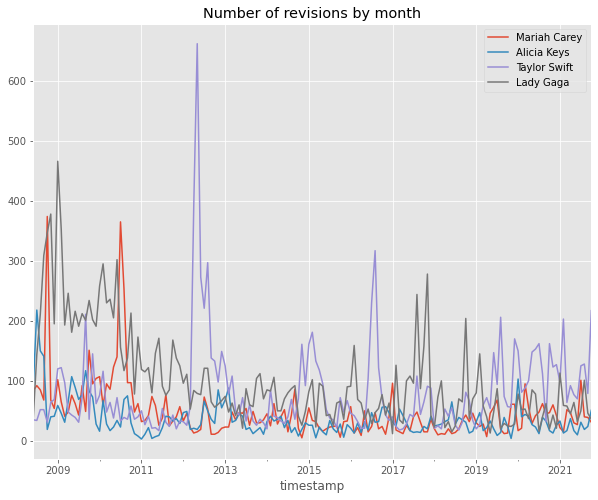

In [62]:
df.plot(figsize=(10,8),title="Number of revisions by month")
plt.show()

In [73]:
import plotly.express as px
fig = px.area(df, facet_col="artist", facet_col_wrap=2)
fig.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

